---
title: "Assignment 1 - Wendy's (WEN) Stock Data Analysis"
author: "Maxim" 
date: "2025-09-xx"
format: pdf
---

\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

# Preparations
Before messing around with the stock data, the environment should install and load the dplyr and lubridate packages to perform easier data analysis.

In [22]:
# installation
install.packages("dplyr")
install.packages("lubridate")
install.packages("ggplot2")

Installing package into ‘/home/codespace/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Installing package into ‘/home/codespace/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/codespace/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtable’, ‘isoband’, ‘S7’




After installing them, the packages are loaded in.

In [23]:
#| warning: false
library(dplyr)
library(lubridate)
library(ggplot2)

# Data Analysis
Now let's start actually processing and transforming the stock data.
First of all, the data must be *read* into existence, so that it becomes a workable dataframe. Columns irrelevant to this exercise are removed for illustration purposes.
<br> But to ensure correct formatting, the `datadate` variable is adjusted to the standard date format. 

In [3]:
# load csv file as stock_data but clean the date format
data = read.csv("compustat_food_bev.csv")
stock_data = data[, -c(1, 2, 5)]
stock_data$datadate = as.Date(stock_data$datadate, format = "%d/%m/%Y")

With the stock data in place, only the relevant data set gets filtered out, here: Wendy's (ticker: WEN) 

In [4]:
# construct new data table with stock data exclusively tied to Wendy's
stock_data_wen = filter(stock_data, tic=="WEN")

Inbefore tackling the tasks, some new columns must be created.
<br> These are going to be loaded with metrics such as the daily returns, overnight returns, volume change and MFV of our stock data.

In [5]:
# create new empty columns 
stock_data_wen$retd = 0
stock_data_wen$retov = 0
stock_data_wen$volch = 0
stock_data_wen$mfv = 0

Next, we can actually perform the calculations for these metrics.
\newpage

## (1) Daily Returns

In [6]:
# calculate daily returns as: (closing price_t/closing price_t-1)-1
head(stock_data_wen <- mutate(stock_data_wen, retd = round((prccd/lag(prccd))-1, 2)))

,datadate,tic,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,retd,retov,volch,mfv
,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-01,WEN,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,0,0,0
2,2020-09-02,WEN,3814903,21.970,22.08,21.0100,21.01,14,5812,0.05,0,0,0
3,2020-09-03,WEN,4280982,21.950,22.48,21.6450,21.95,14,5812,0.00,0,0,0
4,2020-09-04,WEN,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.02,0,0,0
5,2020-09-08,WEN,3439170,21.850,22.05,21.2300,21.43,14,5812,0.01,0,0,0
6,2020-09-09,WEN,2847727,22.495,22.61,21.8322,22.00,14,5812,0.03,0,0,0


## (2) Overnight Returns

In [7]:
# calculate overnight returns as: (operning price_t/closing price_t-1)-1
head(stock_data_wen <- mutate(stock_data_wen, retov = round((prcod/lag(prccd))-1, 2)))

,datadate,tic,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,retd,retov,volch,mfv
,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-01,WEN,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,0,0
2,2020-09-02,WEN,3814903,21.970,22.08,21.0100,21.01,14,5812,0.05,0.00,0,0
3,2020-09-03,WEN,4280982,21.950,22.48,21.6450,21.95,14,5812,0.00,0.00,0,0
4,2020-09-04,WEN,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.02,0.01,0,0
5,2020-09-08,WEN,3439170,21.850,22.05,21.2300,21.43,14,5812,0.01,-0.01,0,0
6,2020-09-09,WEN,2847727,22.495,22.61,21.8322,22.00,14,5812,0.03,0.01,0,0


## (3) Volume Change

In [8]:
# calculate volume change as: (volume_t/volume_t-1)-1
head(stock_data_wen <- mutate(stock_data_wen, volch = round((cshtrd/lag(cshtrd))-1, 2)))

,datadate,tic,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,retd,retov,volch,mfv
,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-01,WEN,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,NA,0
2,2020-09-02,WEN,3814903,21.970,22.08,21.0100,21.01,14,5812,0.05,0.00,0.30,0
3,2020-09-03,WEN,4280982,21.950,22.48,21.6450,21.95,14,5812,0.00,0.00,0.12,0
4,2020-09-04,WEN,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.02,0.01,-0.22,0
5,2020-09-08,WEN,3439170,21.850,22.05,21.2300,21.43,14,5812,0.01,-0.01,0.03,0
6,2020-09-09,WEN,2847727,22.495,22.61,21.8322,22.00,14,5812,0.03,0.01,-0.17,0


## (4) Money Flow Volume Indicator (MFV)

In [9]:
# calculate mfv
head(stock_data_wen <- mutate(stock_data_wen, 
    mfv = round((
        ((prccd-prcld)-(prchd-prcld))/(prchd-prcld)
        ), 2)
))

,datadate,tic,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,retd,retov,volch,mfv
,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-01,WEN,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,NA,-0.50
2,2020-09-02,WEN,3814903,21.970,22.08,21.0100,21.01,14,5812,0.05,0.00,0.30,-0.10
3,2020-09-03,WEN,4280982,21.950,22.48,21.6450,21.95,14,5812,0.00,0.00,0.12,-0.63
4,2020-09-04,WEN,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.02,0.01,-0.22,-0.82
5,2020-09-08,WEN,3439170,21.850,22.05,21.2300,21.43,14,5812,0.01,-0.01,0.03,-0.24
6,2020-09-09,WEN,2847727,22.495,22.61,21.8322,22.00,14,5812,0.03,0.01,-0.17,-0.15


\newpage
# More features, metrics and dates
After completing the initial analysis, the next part will cover various kinds of data manipulation and appending new variables to the dataframe.

## (5) Month & (6) Year
Once more, first a few more columns are added to hold the data, after which the `month()` and `year()` functions help identifying the respective data points.

In [10]:
# Add column that indicate the month and year
stock_data_wen$mon = 0
stock_data_wen$yr = 0
head(stock_data_wen <- mutate(stock_data_wen,
    mon = month(datadate),
    yr = year(datadate)
))

,datadate,tic,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,retd,retov,volch,mfv,mon,yr
,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-01,WEN,2929911,20.950,21.16,20.7400,20.94,14,5812,NA,NA,NA,-0.50,9,2020
2,2020-09-02,WEN,3814903,21.970,22.08,21.0100,21.01,14,5812,0.05,0.00,0.30,-0.10,9,2020
3,2020-09-03,WEN,4280982,21.950,22.48,21.6450,21.95,14,5812,0.00,0.00,0.12,-0.63,9,2020
4,2020-09-04,WEN,3351921,21.580,22.38,21.4050,22.20,14,5812,-0.02,0.01,-0.22,-0.82,9,2020
5,2020-09-08,WEN,3439170,21.850,22.05,21.2300,21.43,14,5812,0.01,-0.01,0.03,-0.24,9,2020
6,2020-09-09,WEN,2847727,22.495,22.61,21.8322,22.00,14,5812,0.03,0.01,-0.17,-0.15,9,2020


## (7) Total Trading Volume in June 2023
By employing a method innate to R, the `sum()` function, together with a condition tied to the `mon` and `yr` variables lends a quick result to the task. 

In [11]:
# Calculate the total trading volume, in June 2023.
tv0623 = sum(stock_data_wen$cshtrd[
    stock_data_wen$mon == 6 & stock_data_wen$yr==2023
    ])
tv0623

[1] 54557454

## (8) Mean Daily Return
Another method of R, the `mean()` function, produces an even quicker result to this task.

In [12]:
# Calculate the mean daily return, over the entire period.
return_daily_mean = mean(stock_data_wen$retd, na.rm = TRUE)*100
print(paste0(round(return_daily_mean, 2), "%"))


[1] "0.02%"


## (9) Date with the largest High Price
The desired date relates to the maximum value across the `prchd` variable, thereby hinting at applying the `which.max()` function for indexing. Note that applying just the `max()` function does not give the desired result, since it returns the actual price instead of the row index.

In [13]:
# Calculate the date that saw the largest positive high price.
date_highest_high = stock_data_wen$datadate[
    which.max(stock_data_wen$prchd)
    ]
date_highest_high

[1] "2021-06-08"

But it's still interesting to see the price.

In [14]:
# Said price is how much?
price_highest = stock_data_wen$prchd[which.max(stock_data_wen$prchd)]
price_highest

[1] 29.46

## (10) Date with the largest Daily Return
This desired date relates to the maximum value across the `retd` variable, again hinting at the `which.max()` function.

In [15]:
# Calculate the date that saw the largest positive daily return.
date_highest_daily_return = stock_data_wen$datadate[
    which.max(stock_data_wen$retd)
    ]
date_highest_daily_return

[1] "2021-06-08"

The return is..

In [16]:
# Said return is how much?
retd_highest_p = stock_data_wen$retd[which.max(stock_data_wen$retd)]*100
print(paste0(round(retd_highest_p, 2), "%"))

[1] "26%"


# Part 2 Visualisations

[1] "The highest trading volume for Wendy's was 86616410 on 2021-06-08"


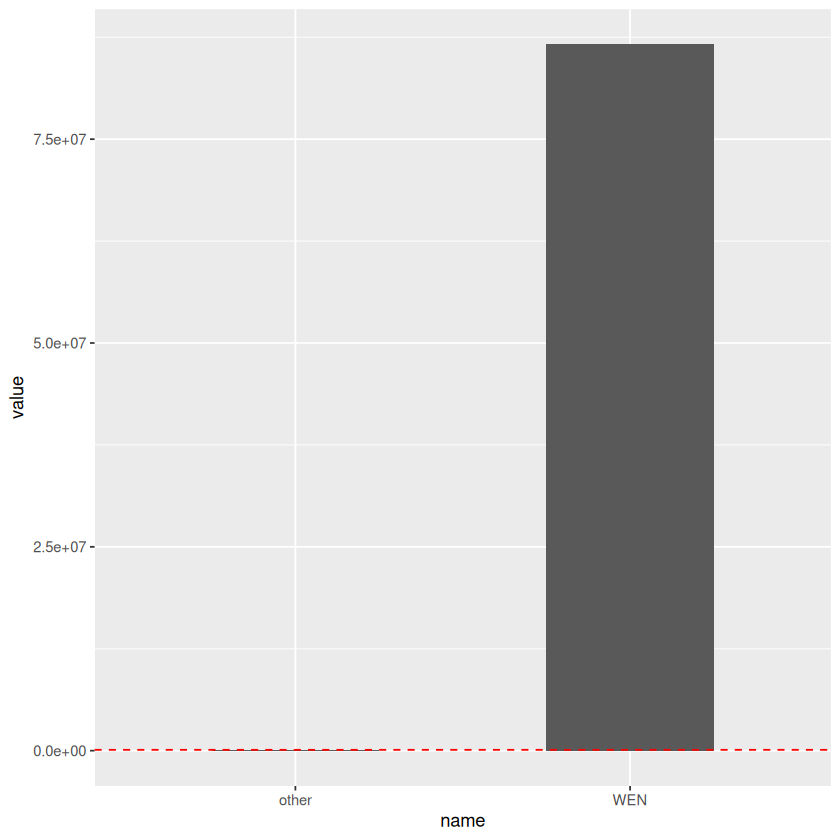

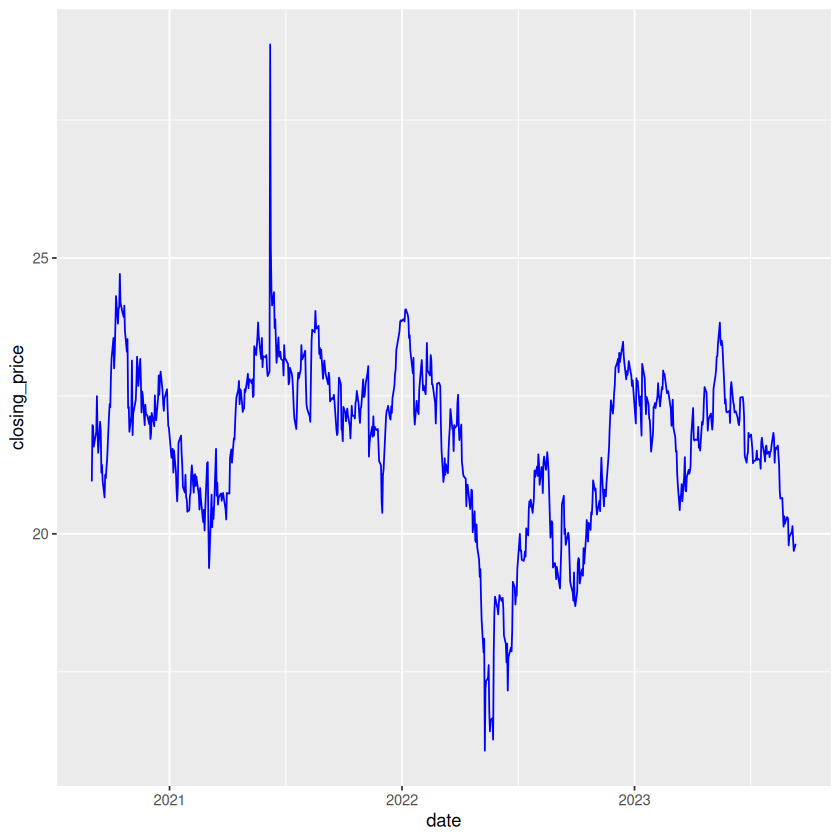

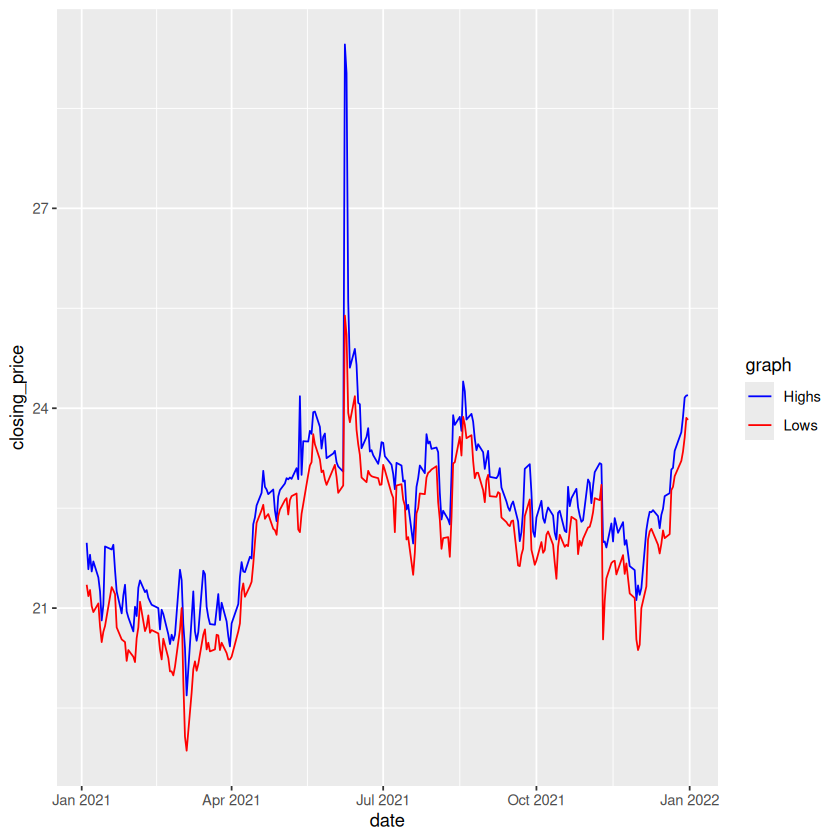

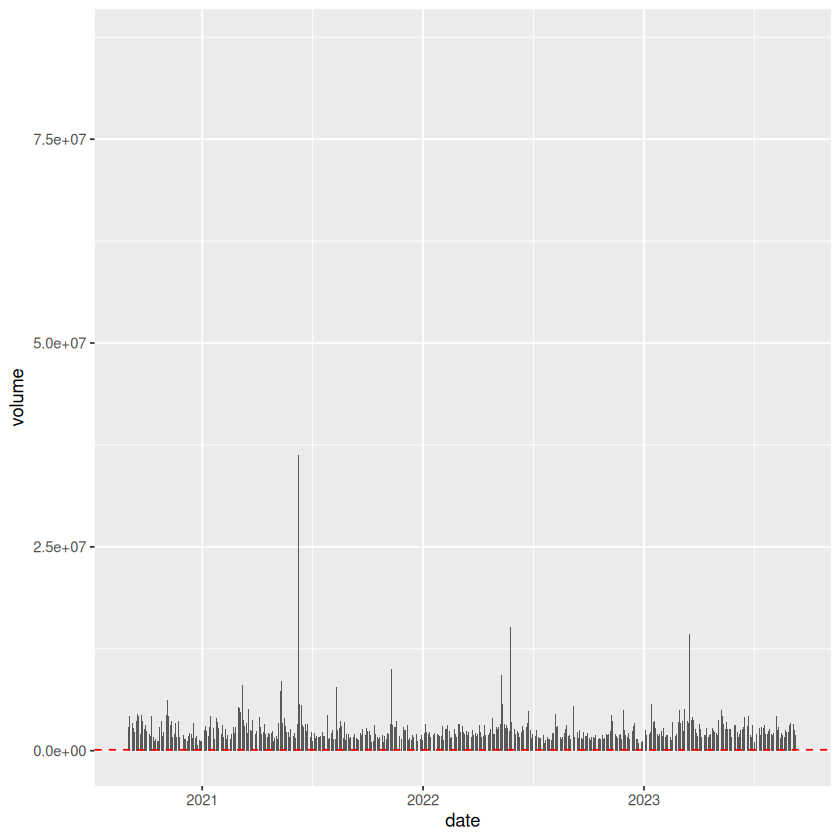

In [59]:
if (max(stock_data_wen$cshtrd) > 100000) {
   highest_trading_v = max(stock_data_wen$cshtrd)   
}
highest_trading_v_d = stock_data_wen$datadate[which.max(stock_data_wen$cshtrd)]
print(paste0("The highest trading volume for Wendy's was ", highest_trading_v," on ", highest_trading_v_d))

df_tickers_v_100000 = data.frame(
      name = c("WEN", "other"),
      value = c(highest_trading_v, 60000)
   )

ggplot(df_tickers_v_100000, aes(x=name, y=value)) +
  geom_bar(stat = "identity", width=0.5) +
  geom_hline(yintercept = 100000, color = "red", linetype = "dashed")

df_tickers_prccd = data.frame(
   date = stock_data_wen$datadate,
   closing_price = stock_data_wen$prccd
   ) 

ggplot(df_tickers_prccd, aes(x=date, y=closing_price)) +
   geom_line(color = "blue")


df_wen_highs = data.frame(
   date = stock_data_wen$datadate,
   closing_price = stock_data_wen$prchd,
   graph = "Highs"
   )

df_wen_highs <- subset(df_wen_highs, format(date, "%Y") == "2021")

df_wen_lows = data.frame(
   date = stock_data_wen$datadate,
   closing_price = stock_data_wen$prcld,
   graph = "Lows"
   )

df_wen_lows <- subset(df_wen_lows, format(date, "%Y") == "2021")


df_wen_hl = rbind(df_wen_highs, df_wen_lows)

ggplot(df_wen_hl, aes(x=date, y=closing_price, color=graph)) +
   geom_line() +
   scale_color_manual(values=c("Highs"="blue", "Lows"="red"))




df_wen_volume = data.frame(
   date = stock_data_wen$datadate,
   volume = stock_data_wen$cshtrd
   )

ggplot(df_wen_volume, aes(x=date, y=volume)) +
  geom_bar(stat = "identity", width=1) +
  geom_hline(yintercept = 100000, color = "red", linetype = "dashed")





